<a href="https://colab.research.google.com/github/Prachisoni07/ml/blob/main/mediapipe_pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Left Arm Angle: 96.07064160057581, Right Arm Angle: 169.46020369399145
Hand Position Classification: Bent Arm


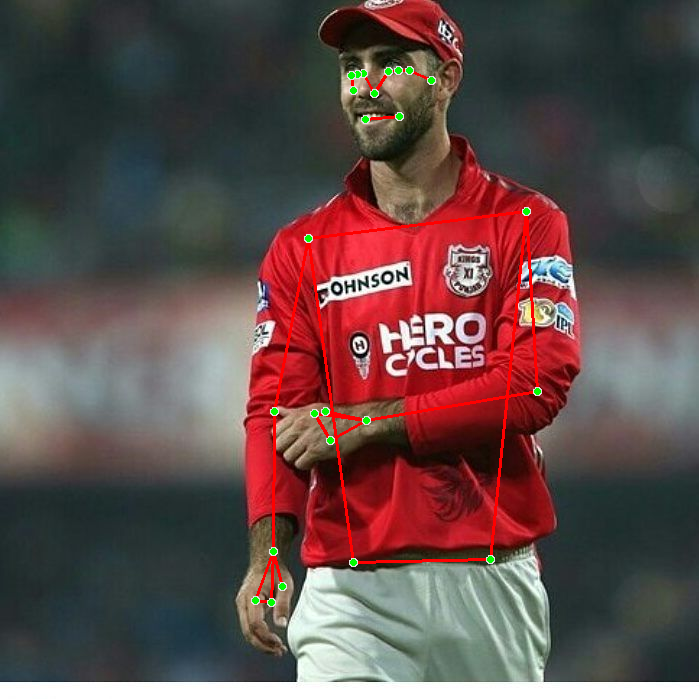

Landmark 0: x=0.5362370014190674, y=0.1332666277885437, z=-0.788948118686676, visibility=0.9978795051574707
Landmark 1: x=0.5554919838905334, y=0.10250484198331833, z=-0.7646769285202026, visibility=0.9953813552856445
Landmark 2: x=0.5708014369010925, y=0.10147833824157715, z=-0.7648846507072449, visibility=0.9938337802886963
Landmark 3: x=0.5861193537712097, y=0.10046636313199997, z=-0.7651660442352295, visibility=0.995093822479248
Landmark 4: x=0.5198329091072083, y=0.10500460863113403, z=-0.7413962483406067, visibility=0.9960318207740784
Landmark 5: x=0.5113674402236938, y=0.10627192258834839, z=-0.7414073348045349, visibility=0.9942902326583862
Landmark 6: x=0.5033794641494751, y=0.10770338773727417, z=-0.7417781352996826, visibility=0.9957289099693298
Landmark 7: x=0.6176331043243408, y=0.11477428674697876, z=-0.5384731292724609, visibility=0.9942289590835571
Landmark 8: x=0.5051397085189819, y=0.12971043586730957, z=-0.4282528758049011, visibility=0.9932076334953308
Landmark 9: x

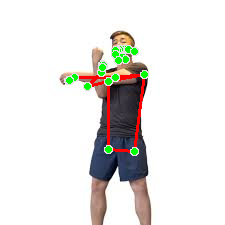

Landmark 0: x=0.5416697263717651, y=0.2422802448272705, z=-0.24758923053741455, visibility=0.9978784322738647
Landmark 1: x=0.5550544857978821, y=0.2203170657157898, z=-0.23406365513801575, visibility=0.9955412745475769
Landmark 2: x=0.563990592956543, y=0.22001361846923828, z=-0.23403775691986084, visibility=0.9941577911376953
Landmark 3: x=0.572752058506012, y=0.21956712007522583, z=-0.23414868116378784, visibility=0.9953125715255737
Landmark 4: x=0.5315407514572144, y=0.2219809740781784, z=-0.20361748337745667, visibility=0.9959791898727417
Landmark 5: x=0.5234588980674744, y=0.2237766981124878, z=-0.2035171538591385, visibility=0.9942933320999146
Landmark 6: x=0.5154260396957397, y=0.2256525158882141, z=-0.20356062054634094, visibility=0.9956325888633728
Landmark 7: x=0.5957188010215759, y=0.22929304838180542, z=-0.07439995557069778, visibility=0.9946343302726746
Landmark 8: x=0.5119909644126892, y=0.2415705919265747, z=0.06554004549980164, visibility=0.9931209683418274
Landmark 9:

In [3]:
!pip install mediapipe

import cv2
import mediapipe as mp
import numpy as np

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(
    static_image_mode=False,
    model_complexity=1,
    smooth_landmarks=True,
    enable_segmentation=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

def calculate_angle(a, b, c):
    a, b, c = np.array(a), np.array(b), np.array(c)

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    return 360 - angle if angle > 180.0 else angle

def classify_hand_position(landmarks):
    if not landmarks:
        return "No landmarks detected"

    left_shoulder = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                     landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    left_elbow = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                  landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
    left_wrist = [landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                  landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

    right_shoulder = [landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                      landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    right_elbow = [landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,
                   landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
    right_wrist = [landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                   landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

    left_arm_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
    right_arm_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)

    print(f"Left Arm Angle: {left_arm_angle}, Right Arm Angle: {right_arm_angle}")

    if left_wrist[1] < left_shoulder[1] or right_wrist[1] < right_shoulder[1]:
        return "Raised Hand"
    elif left_arm_angle > 160 and right_arm_angle > 160:
        return "Straight Arm"
    elif left_arm_angle < 160 or right_arm_angle < 160:
        return "Bent Arm"
    elif abs(left_wrist[0] - right_shoulder[0]) < 0.1 or abs(right_wrist[0] - left_shoulder[0]) < 0.1:
        return "Crossed Arm"

    return "Unknown"

def process_image(image_path):
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(rgb_image)
    classification = classify_hand_position(results.pose_landmarks)
    print(f"Hand Position Classification: {classification}")

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 255, 0)),
            mp_drawing.DrawingSpec(color=(0, 0, 255))
        )

    from google.colab.patches import cv2_imshow
    cv2_imshow(image)

    if results.pose_landmarks:
        for idx, landmark in enumerate(results.pose_landmarks.landmark):
            print(f"Landmark {idx}: x={landmark.x}, y={landmark.y}, z={landmark.z}, visibility={landmark.visibility}")

process_image('/content/maxwell.ml2.jpg')
process_image('/content/imagesml.jpeg')


MediaPipe: A Versatile Framework for Perception Pipelines
MediaPipe, developed by Google, is an open-source framework designed to create multimodal machine learning pipelines using video, audio, and sensor data. It simplifies complex tasks like hand tracking, facial recognition, and pose estimation through a highly flexible and efficient infrastructure.

🔹 Core Components of MediaPipe
1️⃣ Graph-Based Architecture
MediaPipe operates on a graph-based system where different tasks are broken down into interconnected nodes (calculators).
These nodes exchange data streams and perform various operations like image processing, feature extraction, and AI model execution.
2️⃣ Calculators
Calculators are the building blocks of MediaPipe’s computation.
Each calculator is responsible for a particular function, such as:
Processing images
Running machine learning models
Performing mathematical operations
They can be implemented in Python or C++.
3️⃣ Packets
MediaPipe transmits data in the form of packets, each containing a timestamped data piece (e.g., an image, keypoints, or matrices).
Timestamps ensure synchronization, allowing multiple data streams to work together seamlessly.
4️⃣ Streams
Streams serve as the data carriers between different calculators.
They enable smooth data transmission within the graph.
5️⃣ Subgraphs
Subgraphs are reusable groups of calculators and streams.
These modular components simplify graph organization and pipeline efficiency.
⚙️ How MediaPipe Processes Data
1️⃣ Constructing a Graph
A MediaPipe pipeline starts by defining a graph, specifying:
Calculators (processing units)
Data streams (connections between nodes)
Graphs can be configured via:
A .pbtxt configuration file
Programmatic implementation in Python or C++
2️⃣ Initializing the Graph
When the graph is initialized, MediaPipe:
Allocates resources
Loads calculators
Sets up data streams
3️⃣ Processing Packets
Data is processed in timestamped packets, ensuring:
Accurate synchronization
Smooth real-time execution
4️⃣ Executing Calculators
Each calculator in the pipeline processes the packets step by step.
Example (Face Detection):
Step 1: Preprocess the input image
Step 2: Run a face detection AI model
Step 3: Output bounding boxes around detected faces
5️⃣ Generating the Output
The final result is a collection of processed packets containing inference data.
Example: A pose estimation model outputs keypoints representing human body joints.
📌 Example: Hand Tracking with MediaPipe
1️⃣ Defining the Pipeline
The pipeline includes calculators for:
Image preprocessing
Hand detection
Landmark estimation
2️⃣ Graph Initialization
The system initializes the necessary components to begin processing frames.
3️⃣ Processing Video Frames
As frames are streamed into the pipeline, they pass through:
Preprocessing stage
Hand detection model
Landmark detection for precise hand keypoints
4️⃣ Output Results
The final output consists of hand landmarks, mapping key points of the fingers and palm in real-time.
🚀 Why Choose MediaPipe?
✔ Modular & Scalable – Easily customize and extend pipelines using the graph-based system.
✔ Optimized for Performance – Designed for real-time applications like AR/VR, gaming, and AI-based analytics.
✔ Cross-Platform Support – Runs on Android, iOS, Web, and Desktop environments.
✔ Prebuilt AI Models – Includes ready-to-use solutions for face detection, pose tracking, and hand recognition.